In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
data = pd.read_csv('../kyphosis.csv')

In [5]:
data.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


# EDA

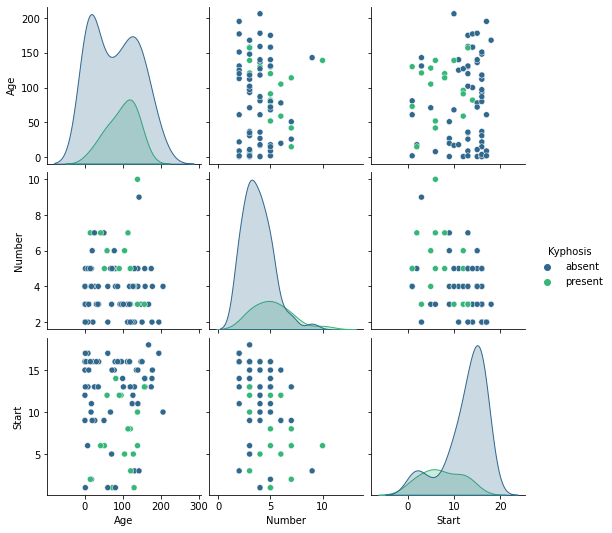

In [6]:
sns.pairplot(data, hue='Kyphosis' ,palette='viridis')

# Test Train split


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
data_x = data.drop('Kyphosis', axis=1)
data_y = data['Kyphosis']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=101)

# Decision Tree

### Train model using single decision tree

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
model = DecisionTreeClassifier()

In [12]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [13]:
pred = model.predict(x_test)

In [14]:
predict = model.predict(np.array([[71,3,5]]))
print(predict)


['absent']


/home/jeel/Documents/kyphosis/env/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [15]:
from sklearn.metrics import classification_report,confusion_matrix

In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      absent       0.67      0.71      0.69        17
     present       0.29      0.25      0.27         8

    accuracy                           0.56        25
   macro avg       0.48      0.48      0.48        25
weighted avg       0.54      0.56      0.55        25



In [17]:
print(confusion_matrix(y_test,pred))

[[12  5]
 [ 6  2]]


In [18]:
#Store the model parameters using Pickle libraries

import pickle
pickle.dump(model, open('kyphosis_dt_model.pkl','wb'))